In [2]:
# This chapter teaches how to manipulate geographic objects based on attributes 
# such as the names of bus stops in a vector dataset and elevations of pixels in a raster dataset.

# Preparation
# Import required packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import rasterio

# Import required data files
world = gpd.read_file('data/world.gpkg')
src_elev = rasterio.open('output/elev.tif')
src_grain = rasterio.open('output/grain.tif')
src_multi_rast = rasterio.open('data/landsat.tif')

#### Vector attribute manipulation
Vector layers are basically extended tables, the difference being that a vector layer has a geometry column. 
Therefore, all ordinary table-related operations from package pandas are supported for geopandas vector layers as well

##### Vector attribute subsetting

In [4]:
# Subsetting the world GeoDataFrame by position for the first 3 rows
world.iloc[0:3, :]

,iso_a2,name_long,continent,region_un,subregion,type,area_km2,pop,lifeExp,gdpPercap,geometry
0,FJ,Fiji,Oceania,Oceania,Melanesia,Sovereign country,19289.970733,885806.0,69.960,8222.253784,"MULTIPOLYGON (((-180.00000 -16.55522, -179.917..."
1,TZ,Tanzania,Africa,Africa,Eastern Africa,Sovereign country,932745.792357,52234869.0,64.163,2402.099404,"MULTIPOLYGON (((33.90371 -0.95000, 31.86617 -1..."
2,EH,Western Sahara,Africa,Africa,Northern Africa,Indeterminate,96270.601041,NaN,NaN,NaN,"MULTIPOLYGON (((-8.66559 27.65643, -8.81783 27..."


In [5]:
# Subsetting columns by position: 
world.iloc[:, 0:3]

,iso_a2,name_long,continent
0,FJ,Fiji,Oceania
1,TZ,Tanzania,Africa
2,EH,Western Sahara,Africa
3,CA,Canada,North America
4,US,United States,North America
...,...,...,...
172,RS,Serbia,Europe
173,ME,Montenegro,Europe
174,XK,Kosovo,Europe
175,TT,Trinidad and Tobago,North America


In [6]:
# To subset rows n columns by position, we need to specify both rows n column indices separated by a comma
world.iloc[0:3, 0:3]

,iso_a2,name_long,continent
0,FJ,Fiji,Oceania
1,TZ,Tanzania,Africa
2,EH,Western Sahara,Africa


In [7]:
# Subsetting columns by name is done with the .loc method or directly in a [[ notation
world[['name_long', 'geometry']]

,name_long,geometry
0,Fiji,"MULTIPOLYGON (((-180.00000 -16.55522, -179.917..."
1,Tanzania,"MULTIPOLYGON (((33.90371 -0.95000, 31.86617 -1..."
2,Western Sahara,"MULTIPOLYGON (((-8.66559 27.65643, -8.81783 27..."
3,Canada,"MULTIPOLYGON (((-132.71001 54.04001, -133.1800..."
4,United States,"MULTIPOLYGON (((-171.73166 63.78252, -171.7911..."
...,...,...
172,Serbia,"MULTIPOLYGON (((18.82982 45.90887, 19.07277 45..."
173,Montenegro,"MULTIPOLYGON (((20.07070 42.58863, 20.25758 42..."
174,Kosovo,"MULTIPOLYGON (((20.59025 41.85541, 20.71731 41..."
175,Trinidad and Tobago,"MULTIPOLYGON (((-61.68000 10.76000, -61.66000 ..."


In [8]:
# To select many successive columns, we can use the slice : operator
world.loc[:, 'name_long':'pop']

,name_long,continent,region_un,subregion,type,area_km2,pop
0,Fiji,Oceania,Oceania,Melanesia,Sovereign country,1.928997e+04,885806.0
1,Tanzania,Africa,Africa,Eastern Africa,Sovereign country,9.327458e+05,52234869.0
2,Western Sahara,Africa,Africa,Northern Africa,Indeterminate,9.627060e+04,NaN
3,Canada,North America,Americas,Northern America,Sovereign country,1.003604e+07,35535348.0
4,United States,North America,Americas,Northern America,Country,9.510744e+06,318622525.0
...,...,...,...,...,...,...,...
172,Serbia,Europe,Europe,Southern Europe,Sovereign country,7.638861e+04,7130576.0
173,Montenegro,Europe,Europe,Southern Europe,Sovereign country,1.344368e+04,621810.0
174,Kosovo,Europe,Europe,Southern Europe,Sovereign country,1.123026e+04,1821800.0
175,Trinidad and Tobago,North America,Americas,Caribbean,Sovereign country,7.737810e+03,1354493.0


In [13]:
# Removing rows/columns is done using the .drop method. We can remove specific rows by specifying their IDs
world.drop([2,3,5])

,iso_a2,name_long,continent,region_un,subregion,type,area_km2,pop,lifeExp,gdpPercap,geometry
0,FJ,Fiji,Oceania,Oceania,Melanesia,Sovereign country,1.928997e+04,885806.0,69.960000,8222.253784,"MULTIPOLYGON (((-180.00000 -16.55522, -179.917..."
1,TZ,Tanzania,Africa,Africa,Eastern Africa,Sovereign country,9.327458e+05,52234869.0,64.163000,2402.099404,"MULTIPOLYGON (((33.90371 -0.95000, 31.86617 -1..."
4,US,United States,North America,Americas,Northern America,Country,9.510744e+06,318622525.0,78.841463,51921.984639,"MULTIPOLYGON (((-171.73166 63.78252, -171.7911..."
6,UZ,Uzbekistan,Asia,Asia,Central Asia,Sovereign country,4.614103e+05,30757700.0,71.039000,5370.865802,"MULTIPOLYGON (((55.96819 41.30864, 57.09639 41..."
7,PG,Papua New Guinea,Oceania,Oceania,Melanesia,Sovereign country,4.645201e+05,7755785.0,65.230000,3709.081644,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
...,...,...,...,...,...,...,...,...,...,...,...
172,RS,Serbia,Europe,Europe,Southern Europe,Sovereign country,7.638861e+04,7130576.0,75.336585,13112.908958,"MULTIPOLYGON (((18.82982 45.90887, 19.07277 45..."
173,ME,Montenegro,Europe,Europe,Southern Europe,Sovereign country,1.344368e+04,621810.0,76.712000,14796.635396,"MULTIPOLYGON (((20.07070 42.58863, 20.25758 42..."
174,XK,Kosovo,Europe,Europe,Southern Europe,Sovereign country,1.123026e+04,1821800.0,71.097561,8698.291559,"MULTIPOLYGON (((20.59025 41.85541, 20.71731 41..."
175,TT,Trinidad and Tobago,North America,Americas,Caribbean,Sovereign country,7.737810e+03,1354493.0,70.426000,31181.821196,"MULTIPOLYGON (((-61.68000 10.76000, -61.66000 ..."


In [14]:
# To remove specific columns, we need to specify the axis argument
world.drop(['name_long', 'continent'], axis=1)

,iso_a2,region_un,subregion,type,area_km2,pop,lifeExp,gdpPercap,geometry
0,FJ,Oceania,Melanesia,Sovereign country,1.928997e+04,885806.0,69.960000,8222.253784,"MULTIPOLYGON (((-180.00000 -16.55522, -179.917..."
1,TZ,Africa,Eastern Africa,Sovereign country,9.327458e+05,52234869.0,64.163000,2402.099404,"MULTIPOLYGON (((33.90371 -0.95000, 31.86617 -1..."
2,EH,Africa,Northern Africa,Indeterminate,9.627060e+04,NaN,NaN,NaN,"MULTIPOLYGON (((-8.66559 27.65643, -8.81783 27..."
3,CA,Americas,Northern America,Sovereign country,1.003604e+07,35535348.0,81.953049,43079.142525,"MULTIPOLYGON (((-132.71001 54.04001, -133.1800..."
4,US,Americas,Northern America,Country,9.510744e+06,318622525.0,78.841463,51921.984639,"MULTIPOLYGON (((-171.73166 63.78252, -171.7911..."
...,...,...,...,...,...,...,...,...,...
172,RS,Europe,Southern Europe,Sovereign country,7.638861e+04,7130576.0,75.336585,13112.908958,"MULTIPOLYGON (((18.82982 45.90887, 19.07277 45..."
173,ME,Europe,Southern Europe,Sovereign country,1.344368e+04,621810.0,76.712000,14796.635396,"MULTIPOLYGON (((20.07070 42.58863, 20.25758 42..."
174,XK,Europe,Southern Europe,Sovereign country,1.123026e+04,1821800.0,71.097561,8698.291559,"MULTIPOLYGON (((20.59025 41.85541, 20.71731 41..."
175,TT,Americas,Caribbean,Sovereign country,7.737810e+03,1354493.0,70.426000,31181.821196,"MULTIPOLYGON (((-61.68000 10.76000, -61.66000 ..."


In [16]:
# We can also rename columns with the .rename method by passing a dict with items
world[['name_long', 'pop']].rename(columns={'pop':'population'})

,name_long,population
0,Fiji,885806.0
1,Tanzania,52234869.0
2,Western Sahara,NaN
3,Canada,35535348.0
4,United States,318622525.0
...,...,...
172,Serbia,7130576.0
173,Montenegro,621810.0
174,Kosovo,1821800.0
175,Trinidad and Tobago,1354493.0


In [18]:
# We can use logical vectors for subsetting by creating a new GeoDataFrame called small_countries
idx_small = world['area_km2'] < 10000 # a logical 'Series'
small_countries = world[idx_small]
small_countries

# A more concise command omits the intermediary obj by combining the two steps into one
small_countries = world[world['area_km2'] < 10000]
small_countries

,iso_a2,name_long,continent,region_un,subregion,type,area_km2,pop,lifeExp,gdpPercap,geometry
45,PR,Puerto Rico,North America,Americas,Caribbean,Dependency,9224.663167,3534874.0,79.390122,35066.046376,"MULTIPOLYGON (((-66.28243 18.51476, -67.10068 ..."
79,PS,Palestine,Asia,Asia,Western Asia,Disputed,5037.103826,4294682.0,73.126000,4319.528283,"MULTIPOLYGON (((35.39756 31.48909, 35.54525 31..."
89,VU,Vanuatu,Oceania,Oceania,Melanesia,Sovereign country,7490.040147,258850.0,71.709000,2892.341604,"MULTIPOLYGON (((166.79316 -15.66881, 167.00121..."
128,LU,Luxembourg,Europe,Europe,Western Europe,Sovereign country,2416.870483,556319.0,82.229268,93655.334163,"MULTIPOLYGON (((6.04307 50.12805, 5.78242 50.0..."
160,None,Northern Cyprus,Asia,Asia,Western Asia,Sovereign country,3786.364506,NaN,NaN,NaN,"MULTIPOLYGON (((32.73178 35.14003, 32.91957 35..."
161,CY,Cyprus,Asia,Asia,Western Asia,Sovereign country,6207.006191,1152309.0,80.173000,29786.365653,"MULTIPOLYGON (((32.73178 35.14003, 32.25667 35..."
175,TT,Trinidad and Tobago,North America,Americas,Caribbean,Sovereign country,7737.809855,1354493.0,70.426000,31181.821196,"MULTIPOLYGON (((-61.68000 10.76000, -61.66000 ..."


In [19]:
# We can also combine indexes using logical operators &, | and ~
idx_small = world['area_km2'] < 10000
idx_asia = world['continent'] == 'Asia'
world.loc[idx_small & idx_asia, ['name_long', 'continent', 'area_km2']]

,name_long,continent,area_km2
79,Palestine,Asia,5037.103826
160,Northern Cyprus,Asia,3786.364506
161,Cyprus,Asia,6207.006191


In [22]:
# The various methods can be chained for any combination with several subsetting steps
# For example the ffg code selects only countries from Asia, keeps only the name_long n continent columns 
# and select the first 5 rows
world[world['continent'] == 'Asia']  \
    .loc[:, ['name_long', 'continent']]  \
    .iloc[0:5, :]

,name_long,continent
5,Kazakhstan,Asia
6,Uzbekistan,Asia
8,Indonesia,Asia
24,Timor-Leste,Asia
76,Israel,Asia


In [24]:
# Parenthesis are necessary otherwise Python precedence rules kicks in and the command returns an error
world[
        (world['continent'] == 'North America') | 
        (world['continent'] ==  'South America')
    ]  \
    .loc[:, ['name_long', 'continent']]

,name_long,continent
3,Canada,North America
4,United States,North America
9,Argentina,South America
10,Chile,South America
16,Haiti,North America
17,Dominican Republic,North America
19,Bahamas,North America
20,Falkland Islands,South America
22,Greenland,North America
27,Mexico,North America


In [34]:
# Expressions combining multiple comparisons with the == and | can be replaced with .isin which is more concise and 
# easy to manage when the number of comparisons is large
world[world['continent'].isin(['North America', 'South America'])] \
    .loc[:, ['name_long', 'continent']]

,name_long,continent
3,Canada,North America
4,United States,North America
9,Argentina,South America
10,Chile,South America
16,Haiti,North America
17,Dominican Republic,North America
19,Bahamas,North America
20,Falkland Islands,South America
22,Greenland,North America
27,Mexico,North America


#### Vector attribute aggregation
Aggregation typically involves summarizing data based on one/more grouping variables (typically values in a column)


In [35]:
# An example of attribute-based aggregation is calculating the number of people per continent
# based on country-level data (one row per country)
# Attribute-based aggregation can be achieved using a combination of groupby n sum
# reset_index method moves the grouping variable into an ordinary column
world_agg1 = world.groupby('continent')[['pop']].sum().reset_index()
world_agg1

,continent,pop
0,Africa,1.154947e+09
1,Antarctica,0.000000e+00
2,Asia,4.311408e+09
3,Europe,6.690363e+08
4,North America,5.650287e+08
5,Oceania,3.775783e+07
6,Seven seas (open ocean),0.000000e+00
7,South America,4.120608e+08


In [36]:
# If we want to include the geometry in the aggregation result, we can use the .dissolve method. 
# That way, in addition to the summed population, we also get the associated geometry per continent, 
# i.e. the union of all countries. Use the reset_index method to turn row indices back into ordinary columns
world_agg2 = world[['continent', 'pop', 'geometry']] \
    .dissolve(by='continent', aggfunc='sum') \
    .reset_index()
world_agg2

,continent,geometry,pop
0,Africa,"MULTIPOLYGON (((-11.43878 6.78592, -11.70819 6...",1.154947e+09
1,Antarctica,"MULTIPOLYGON (((-61.13898 -79.98137, -60.61012...",0.000000e+00
2,Asia,"MULTIPOLYGON (((48.67923 14.00320, 48.23895 13...",4.311408e+09
3,Europe,"MULTIPOLYGON (((-53.55484 2.33490, -53.77852 2...",6.690363e+08
4,North America,"MULTIPOLYGON (((-155.22217 19.23972, -155.5421...",5.650287e+08
5,Oceania,"MULTIPOLYGON (((147.91405 -43.21152, 147.56456...",3.775783e+07
6,Seven seas (open ocean),"POLYGON ((68.93500 -48.62500, 68.86750 -48.830...",0.000000e+00
7,South America,"MULTIPOLYGON (((-68.63999 -55.58002, -69.23210...",4.120608e+08


c:\python37\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


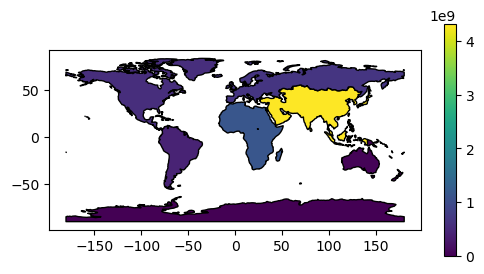

In [37]:
# The world_agg2 obj is a GeoDataFrame containing 8 features representing the continents of the world that we can plot:
fig, ax = plt.subplots(figsize=(6, 3))
world_agg2.plot(column='pop', edgecolor='black', legend=True, ax=ax);

In [38]:
# As a more complex example, the ffg code shows how we can calculate the total popn, area n count of countries per continent
world_agg3 = world.dissolve(
    by='continent', 
    aggfunc={
        'name_long':'count', 
        'pop':'sum', 
        'area_km2':'sum'
    }).rename(columns={'name_long':'n'}).reset_index()
world_agg3

,continent,geometry,n,pop,area_km2
0,Africa,"MULTIPOLYGON (((-11.43878 6.78592, -11.70819 6...",51,1.154947e+09,2.994620e+07
1,Antarctica,"MULTIPOLYGON (((-61.13898 -79.98137, -60.61012...",1,0.000000e+00,1.233596e+07
2,Asia,"MULTIPOLYGON (((48.67923 14.00320, 48.23895 13...",47,4.311408e+09,3.125246e+07
3,Europe,"MULTIPOLYGON (((-53.55484 2.33490, -53.77852 2...",39,6.690363e+08,2.306522e+07
4,North America,"MULTIPOLYGON (((-155.22217 19.23972, -155.5421...",18,5.650287e+08,2.448431e+07
5,Oceania,"MULTIPOLYGON (((147.91405 -43.21152, 147.56456...",7,3.775783e+07,8.504489e+06
6,Seven seas (open ocean),"POLYGON ((68.93500 -48.62500, 68.86750 -48.830...",1,0.000000e+00,1.160257e+04
7,South America,"MULTIPOLYGON (((-68.63999 -55.58002, -69.23210...",13,4.120608e+08,1.776259e+07


c:\python37\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\python37\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\python37\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


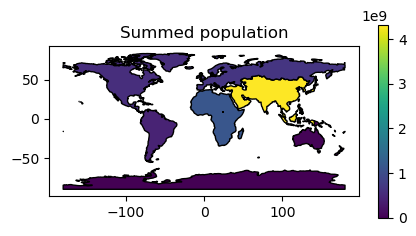

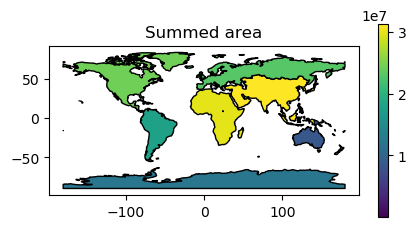

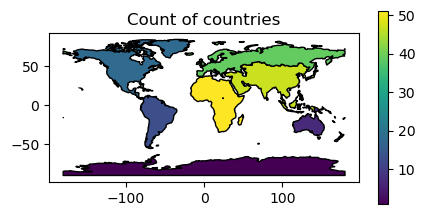

In [52]:
# To visualize the three aggregated attributes:

# Summed population
fig, ax = plt.subplots(figsize=(5, 2.5))
ax.set_title('Summed population')
world_agg3.plot(column='pop', edgecolor='black', legend=True, ax=ax)

# Summed area
fig, ax = plt.subplots(figsize=(5, 2.5))
ax.set_title('Summed area')
world_agg3.plot(column='area_km2', edgecolor='black', legend=True, ax=ax)

# Count of countries
fig, ax = plt.subplots(figsize=(5, 2.5))
ax.set_title('Count of countries')
world_agg3.plot(column='n', edgecolor='black', legend=True, ax=ax)

There are several other table-related operations that are possible, such as creating columns/sorting the values:
Given the world_agg3 continent summary:
- drop the geometry column
- calculate popn density of each continent
- arrange continents by the number countries they contain
- keep the 3 most populous continents

In [53]:
world_agg4 = world_agg3.drop(columns=['geometry'])
world_agg4['density'] = world_agg4['pop'] / world_agg4['area_km2']
world_agg4 = world_agg4.sort_values(by='n', ascending=False)
world_agg4 = world_agg4.head(3)
world_agg4

,continent,n,pop,area_km2,density
0,Africa,51,1.154947e+09,2.994620e+07,38.567388
2,Asia,47,4.311408e+09,3.125246e+07,137.954201
3,Europe,39,6.690363e+08,2.306522e+07,29.006283


#### Vector attribute joining
Combining data from different sources is a common task for data preparation. Joins do this by combining tables based on a shared key variable

In [55]:
# A common type of attribute join is to join DataFrame with GeoDataFrame
coffee_data = pd.read_csv('data/coffee_data.csv')
coffee_data.head(2)

,name_long,coffee_production_2016,coffee_production_2017
0,Angola,NaN,NaN
1,Bolivia,3.0,4.0


In [58]:
# A left join merges world with coffee_data based on the common name_long column
world_coffee = pd.merge(world, coffee_data, on='name_long', how='left')
world_coffee.head(5)

,iso_a2,name_long,continent,region_un,subregion,type,area_km2,pop,lifeExp,gdpPercap,geometry,coffee_production_2016,coffee_production_2017
0,FJ,Fiji,Oceania,Oceania,Melanesia,Sovereign country,1.928997e+04,885806.0,69.960000,8222.253784,"MULTIPOLYGON (((-180.00000 -16.55522, -179.917...",NaN,NaN
1,TZ,Tanzania,Africa,Africa,Eastern Africa,Sovereign country,9.327458e+05,52234869.0,64.163000,2402.099404,"MULTIPOLYGON (((33.90371 -0.95000, 31.86617 -1...",81.0,66.0
2,EH,Western Sahara,Africa,Africa,Northern Africa,Indeterminate,9.627060e+04,NaN,NaN,NaN,"MULTIPOLYGON (((-8.66559 27.65643, -8.81783 27...",NaN,NaN
3,CA,Canada,North America,Americas,Northern America,Sovereign country,1.003604e+07,35535348.0,81.953049,43079.142525,"MULTIPOLYGON (((-132.71001 54.04001, -133.1800...",NaN,NaN
4,US,United States,North America,Americas,Northern America,Country,9.510744e+06,318622525.0,78.841463,51921.984639,"MULTIPOLYGON (((-171.73166 63.78252, -171.7911...",NaN,NaN


c:\python37\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\python37\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


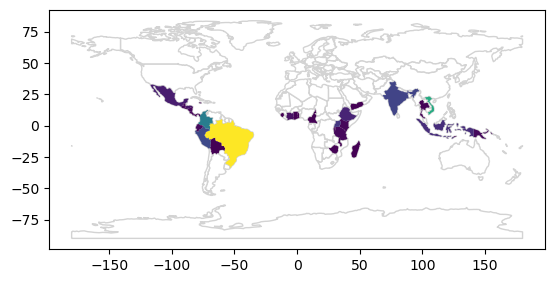

In [59]:
# We're using a technique to plot two layers (all of the world countries outline, and coffee production with symbology) at once
base = world_coffee.plot(color='white', edgecolor='lightgrey')
coffee_map = world_coffee.plot(ax=base, column='coffee_production_2017');

#### Creating attributes and removing spatial information

In [63]:
# Often we would like to create a new column based on already existing columns. 
# Note that we're working on a copy of the data so that we do not modify the original layer:
world2 = world.copy()
world2['pop_dens'] = world2['pop'] / world2['area_km2']
world2

,iso_a2,name_long,continent,region_un,subregion,type,area_km2,pop,lifeExp,gdpPercap,geometry,pop_dens
0,FJ,Fiji,Oceania,Oceania,Melanesia,Sovereign country,1.928997e+04,885806.0,69.960000,8222.253784,"MULTIPOLYGON (((-180.00000 -16.55522, -179.917...",45.920547
1,TZ,Tanzania,Africa,Africa,Eastern Africa,Sovereign country,9.327458e+05,52234869.0,64.163000,2402.099404,"MULTIPOLYGON (((33.90371 -0.95000, 31.86617 -1...",56.001184
2,EH,Western Sahara,Africa,Africa,Northern Africa,Indeterminate,9.627060e+04,NaN,NaN,NaN,"MULTIPOLYGON (((-8.66559 27.65643, -8.81783 27...",NaN
3,CA,Canada,North America,Americas,Northern America,Sovereign country,1.003604e+07,35535348.0,81.953049,43079.142525,"MULTIPOLYGON (((-132.71001 54.04001, -133.1800...",3.540773
4,US,United States,North America,Americas,Northern America,Country,9.510744e+06,318622525.0,78.841463,51921.984639,"MULTIPOLYGON (((-171.73166 63.78252, -171.7911...",33.501326
...,...,...,...,...,...,...,...,...,...,...,...,...
172,RS,Serbia,Europe,Europe,Southern Europe,Sovereign country,7.638861e+04,7130576.0,75.336585,13112.908958,"MULTIPOLYGON (((18.82982 45.90887, 19.07277 45...",93.346069
173,ME,Montenegro,Europe,Europe,Southern Europe,Sovereign country,1.344368e+04,621810.0,76.712000,14796.635396,"MULTIPOLYGON (((20.07070 42.58863, 20.25758 42...",46.252967
174,XK,Kosovo,Europe,Europe,Southern Europe,Sovereign country,1.123026e+04,1821800.0,71.097561,8698.291559,"MULTIPOLYGON (((20.59025 41.85541, 20.71731 41...",162.222400
175,TT,Trinidad and Tobago,North America,Americas,Caribbean,Sovereign country,7.737810e+03,1354493.0,70.426000,31181.821196,"MULTIPOLYGON (((-61.68000 10.76000, -61.66000 ...",175.048628


In [64]:
# To paste together existing columns we can use the + operator as if we're working with individual strings 
# For example, we want to combine the continent and region_un columns into a new column named con_reg using : as separator
world2['con_reg'] = world2['continent'] + ':' + world2['region_un']
world2 = world2.drop(['continent', 'region_un'], axis = 1)
world2

,iso_a2,name_long,subregion,type,area_km2,pop,lifeExp,gdpPercap,geometry,pop_dens,con_reg
0,FJ,Fiji,Melanesia,Sovereign country,1.928997e+04,885806.0,69.960000,8222.253784,"MULTIPOLYGON (((-180.00000 -16.55522, -179.917...",45.920547,Oceania:Oceania
1,TZ,Tanzania,Eastern Africa,Sovereign country,9.327458e+05,52234869.0,64.163000,2402.099404,"MULTIPOLYGON (((33.90371 -0.95000, 31.86617 -1...",56.001184,Africa:Africa
2,EH,Western Sahara,Northern Africa,Indeterminate,9.627060e+04,NaN,NaN,NaN,"MULTIPOLYGON (((-8.66559 27.65643, -8.81783 27...",NaN,Africa:Africa
3,CA,Canada,Northern America,Sovereign country,1.003604e+07,35535348.0,81.953049,43079.142525,"MULTIPOLYGON (((-132.71001 54.04001, -133.1800...",3.540773,North America:Americas
4,US,United States,Northern America,Country,9.510744e+06,318622525.0,78.841463,51921.984639,"MULTIPOLYGON (((-171.73166 63.78252, -171.7911...",33.501326,North America:Americas
...,...,...,...,...,...,...,...,...,...,...,...
172,RS,Serbia,Southern Europe,Sovereign country,7.638861e+04,7130576.0,75.336585,13112.908958,"MULTIPOLYGON (((18.82982 45.90887, 19.07277 45...",93.346069,Europe:Europe
173,ME,Montenegro,Southern Europe,Sovereign country,1.344368e+04,621810.0,76.712000,14796.635396,"MULTIPOLYGON (((20.07070 42.58863, 20.25758 42...",46.252967,Europe:Europe
174,XK,Kosovo,Southern Europe,Sovereign country,1.123026e+04,1821800.0,71.097561,8698.291559,"MULTIPOLYGON (((20.59025 41.85541, 20.71731 41...",162.222400,Europe:Europe
175,TT,Trinidad and Tobago,Caribbean,Sovereign country,7.737810e+03,1354493.0,70.426000,31181.821196,"MULTIPOLYGON (((-61.68000 10.76000, -61.66000 ...",175.048628,North America:Americas


In [76]:
# The opposite operation splitting one column into multiple columns can be done using .str.split method
# The .str.split method returns a column of list by default - to place the strings in separate columns - use expand=True
world2[['continent', 'region_un']] = world2['con_reg'] \
    .str.split(':', expand=True)
world2

,iso_a2,name_long,subregion,type,area_km2,pop,lifeExp,gdpPercap,geometry,pop_dens,con_reg,continent,region_un
0,FJ,Fiji,Melanesia,Sovereign country,1.928997e+04,885806.0,69.960000,8222.253784,"MULTIPOLYGON (((-180.00000 -16.55522, -179.917...",45.920547,Oceania:Oceania,Oceania,Oceania
1,TZ,Tanzania,Eastern Africa,Sovereign country,9.327458e+05,52234869.0,64.163000,2402.099404,"MULTIPOLYGON (((33.90371 -0.95000, 31.86617 -1...",56.001184,Africa:Africa,Africa,Africa
2,EH,Western Sahara,Northern Africa,Indeterminate,9.627060e+04,NaN,NaN,NaN,"MULTIPOLYGON (((-8.66559 27.65643, -8.81783 27...",NaN,Africa:Africa,Africa,Africa
3,CA,Canada,Northern America,Sovereign country,1.003604e+07,35535348.0,81.953049,43079.142525,"MULTIPOLYGON (((-132.71001 54.04001, -133.1800...",3.540773,North America:Americas,North America,Americas
4,US,United States,Northern America,Country,9.510744e+06,318622525.0,78.841463,51921.984639,"MULTIPOLYGON (((-171.73166 63.78252, -171.7911...",33.501326,North America:Americas,North America,Americas
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,RS,Serbia,Southern Europe,Sovereign country,7.638861e+04,7130576.0,75.336585,13112.908958,"MULTIPOLYGON (((18.82982 45.90887, 19.07277 45...",93.346069,Europe:Europe,Europe,Europe
173,ME,Montenegro,Southern Europe,Sovereign country,1.344368e+04,621810.0,76.712000,14796.635396,"MULTIPOLYGON (((20.07070 42.58863, 20.25758 42...",46.252967,Europe:Europe,Europe,Europe
174,XK,Kosovo,Southern Europe,Sovereign country,1.123026e+04,1821800.0,71.097561,8698.291559,"MULTIPOLYGON (((20.59025 41.85541, 20.71731 41...",162.222400,Europe:Europe,Europe,Europe
175,TT,Trinidad and Tobago,Caribbean,Sovereign country,7.737810e+03,1354493.0,70.426000,31181.821196,"MULTIPOLYGON (((-61.68000 10.76000, -61.66000 ...",175.048628,North America:Americas,North America,Americas


In [78]:
# Renaming one/more columns can be done with:
world2.rename(columns={'name_long':'name'})

,iso_a2,name,subregion,type,area_km2,pop,lifeExp,gdpPercap,geometry,pop_dens,con_reg,continent,region_un
0,FJ,Fiji,Melanesia,Sovereign country,1.928997e+04,885806.0,69.960000,8222.253784,"MULTIPOLYGON (((-180.00000 -16.55522, -179.917...",45.920547,Oceania:Oceania,Oceania,Oceania
1,TZ,Tanzania,Eastern Africa,Sovereign country,9.327458e+05,52234869.0,64.163000,2402.099404,"MULTIPOLYGON (((33.90371 -0.95000, 31.86617 -1...",56.001184,Africa:Africa,Africa,Africa
2,EH,Western Sahara,Northern Africa,Indeterminate,9.627060e+04,NaN,NaN,NaN,"MULTIPOLYGON (((-8.66559 27.65643, -8.81783 27...",NaN,Africa:Africa,Africa,Africa
3,CA,Canada,Northern America,Sovereign country,1.003604e+07,35535348.0,81.953049,43079.142525,"MULTIPOLYGON (((-132.71001 54.04001, -133.1800...",3.540773,North America:Americas,North America,Americas
4,US,United States,Northern America,Country,9.510744e+06,318622525.0,78.841463,51921.984639,"MULTIPOLYGON (((-171.73166 63.78252, -171.7911...",33.501326,North America:Americas,North America,Americas
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,RS,Serbia,Southern Europe,Sovereign country,7.638861e+04,7130576.0,75.336585,13112.908958,"MULTIPOLYGON (((18.82982 45.90887, 19.07277 45...",93.346069,Europe:Europe,Europe,Europe
173,ME,Montenegro,Southern Europe,Sovereign country,1.344368e+04,621810.0,76.712000,14796.635396,"MULTIPOLYGON (((20.07070 42.58863, 20.25758 42...",46.252967,Europe:Europe,Europe,Europe
174,XK,Kosovo,Southern Europe,Sovereign country,1.123026e+04,1821800.0,71.097561,8698.291559,"MULTIPOLYGON (((20.59025 41.85541, 20.71731 41...",162.222400,Europe:Europe,Europe,Europe
175,TT,Trinidad and Tobago,Caribbean,Sovereign country,7.737810e+03,1354493.0,70.426000,31181.821196,"MULTIPOLYGON (((-61.68000 10.76000, -61.66000 ...",175.048628,North America:Americas,North America,Americas


In [79]:
# To change all column names at once, we assign a list of column names into the .columns property
# The list must be of the same length as the number of columns - world.shape[1]
new_names = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'geom', 'i', 'j', 'k', 'l']
world2.columns = new_names
world2

,a,b,c,d,e,f,g,h,geom,i,j,k,l
0,FJ,Fiji,Melanesia,Sovereign country,1.928997e+04,885806.0,69.960000,8222.253784,"MULTIPOLYGON (((-180.00000 -16.55522, -179.917...",45.920547,Oceania:Oceania,Oceania,Oceania
1,TZ,Tanzania,Eastern Africa,Sovereign country,9.327458e+05,52234869.0,64.163000,2402.099404,"MULTIPOLYGON (((33.90371 -0.95000, 31.86617 -1...",56.001184,Africa:Africa,Africa,Africa
2,EH,Western Sahara,Northern Africa,Indeterminate,9.627060e+04,NaN,NaN,NaN,"MULTIPOLYGON (((-8.66559 27.65643, -8.81783 27...",NaN,Africa:Africa,Africa,Africa
3,CA,Canada,Northern America,Sovereign country,1.003604e+07,35535348.0,81.953049,43079.142525,"MULTIPOLYGON (((-132.71001 54.04001, -133.1800...",3.540773,North America:Americas,North America,Americas
4,US,United States,Northern America,Country,9.510744e+06,318622525.0,78.841463,51921.984639,"MULTIPOLYGON (((-171.73166 63.78252, -171.7911...",33.501326,North America:Americas,North America,Americas
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,RS,Serbia,Southern Europe,Sovereign country,7.638861e+04,7130576.0,75.336585,13112.908958,"MULTIPOLYGON (((18.82982 45.90887, 19.07277 45...",93.346069,Europe:Europe,Europe,Europe
173,ME,Montenegro,Southern Europe,Sovereign country,1.344368e+04,621810.0,76.712000,14796.635396,"MULTIPOLYGON (((20.07070 42.58863, 20.25758 42...",46.252967,Europe:Europe,Europe,Europe
174,XK,Kosovo,Southern Europe,Sovereign country,1.123026e+04,1821800.0,71.097561,8698.291559,"MULTIPOLYGON (((20.59025 41.85541, 20.71731 41...",162.222400,Europe:Europe,Europe,Europe
175,TT,Trinidad and Tobago,Caribbean,Sovereign country,7.737810e+03,1354493.0,70.426000,31181.821196,"MULTIPOLYGON (((-61.68000 10.76000, -61.66000 ...",175.048628,North America:Americas,North America,Americas


In [80]:
# To reorder columns, we can pass a modified columns list to the subsetting operator
# For example, the ffg command reorder world2 columns in reverse alphabetical order
names = sorted(world2.columns, reverse=True)
world2 = world2[names]
world2

,l,k,j,i,h,geom,g,f,e,d,c,b,a
0,Oceania,Oceania,Oceania:Oceania,45.920547,8222.253784,"MULTIPOLYGON (((-180.00000 -16.55522, -179.917...",69.960000,885806.0,1.928997e+04,Sovereign country,Melanesia,Fiji,FJ
1,Africa,Africa,Africa:Africa,56.001184,2402.099404,"MULTIPOLYGON (((33.90371 -0.95000, 31.86617 -1...",64.163000,52234869.0,9.327458e+05,Sovereign country,Eastern Africa,Tanzania,TZ
2,Africa,Africa,Africa:Africa,NaN,NaN,"MULTIPOLYGON (((-8.66559 27.65643, -8.81783 27...",NaN,NaN,9.627060e+04,Indeterminate,Northern Africa,Western Sahara,EH
3,Americas,North America,North America:Americas,3.540773,43079.142525,"MULTIPOLYGON (((-132.71001 54.04001, -133.1800...",81.953049,35535348.0,1.003604e+07,Sovereign country,Northern America,Canada,CA
4,Americas,North America,North America:Americas,33.501326,51921.984639,"MULTIPOLYGON (((-171.73166 63.78252, -171.7911...",78.841463,318622525.0,9.510744e+06,Country,Northern America,United States,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Europe,Europe,Europe:Europe,93.346069,13112.908958,"MULTIPOLYGON (((18.82982 45.90887, 19.07277 45...",75.336585,7130576.0,7.638861e+04,Sovereign country,Southern Europe,Serbia,RS
173,Europe,Europe,Europe:Europe,46.252967,14796.635396,"MULTIPOLYGON (((20.07070 42.58863, 20.25758 42...",76.712000,621810.0,1.344368e+04,Sovereign country,Southern Europe,Montenegro,ME
174,Europe,Europe,Europe:Europe,162.222400,8698.291559,"MULTIPOLYGON (((20.59025 41.85541, 20.71731 41...",71.097561,1821800.0,1.123026e+04,Sovereign country,Southern Europe,Kosovo,XK
175,Americas,North America,North America:Americas,175.048628,31181.821196,"MULTIPOLYGON (((-61.68000 10.76000, -61.66000 ...",70.426000,1354493.0,7.737810e+03,Sovereign country,Caribbean,Trinidad and Tobago,TT


In [81]:
# To remove the geometry column:
world2 = world2.drop('geom', axis=1)
world2 = pd.DataFrame(world2)
world2

,l,k,j,i,h,g,f,e,d,c,b,a
0,Oceania,Oceania,Oceania:Oceania,45.920547,8222.253784,69.960000,885806.0,1.928997e+04,Sovereign country,Melanesia,Fiji,FJ
1,Africa,Africa,Africa:Africa,56.001184,2402.099404,64.163000,52234869.0,9.327458e+05,Sovereign country,Eastern Africa,Tanzania,TZ
2,Africa,Africa,Africa:Africa,NaN,NaN,NaN,NaN,9.627060e+04,Indeterminate,Northern Africa,Western Sahara,EH
3,Americas,North America,North America:Americas,3.540773,43079.142525,81.953049,35535348.0,1.003604e+07,Sovereign country,Northern America,Canada,CA
4,Americas,North America,North America:Americas,33.501326,51921.984639,78.841463,318622525.0,9.510744e+06,Country,Northern America,United States,US
...,...,...,...,...,...,...,...,...,...,...,...,...
172,Europe,Europe,Europe:Europe,93.346069,13112.908958,75.336585,7130576.0,7.638861e+04,Sovereign country,Southern Europe,Serbia,RS
173,Europe,Europe,Europe:Europe,46.252967,14796.635396,76.712000,621810.0,1.344368e+04,Sovereign country,Southern Europe,Montenegro,ME
174,Europe,Europe,Europe:Europe,162.222400,8698.291559,71.097561,1821800.0,1.123026e+04,Sovereign country,Southern Europe,Kosovo,XK
175,Americas,North America,North America:Americas,175.048628,31181.821196,70.426000,1354493.0,7.737810e+03,Sovereign country,Caribbean,Trinidad and Tobago,TT


#### Manipulating raster objects
Raster cell values can be considered the counterpart of vector attribute values. In this section, we cover operations that deal with raster values in a similar way, namely as a series of numbers.

#### Raster subsetting 

In [87]:
# When using rasterio, raster values are accessible through a numpy array which can be imported with .read
# Reading a single raster layer (or the only layer of a single-band raster, such as here) results in a two-dimensional array
elev = src_elev.read(1)
elev

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30],
       [31, 32, 33, 34, 35, 36]], dtype=uint8)

In [88]:
# Then we can access subset of cell values using numpy methods
elev[1, 2]

9

In [89]:
# Cell values can be modified by overwriting existing values in conjunction with a subsetting operation
elev[1, 2] = 0
elev

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  0, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30],
       [31, 32, 33, 34, 35, 36]], dtype=uint8)

In [91]:
# Multiple cells can also be modified in this way to set the first 3 cells in the first row to 0
elev[0, 0:3] = 0
elev

array([[ 0,  0,  0,  4,  5,  6],
       [ 7,  8,  0, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30],
       [31, 32, 33, 34, 35, 36]], dtype=uint8)

In [94]:
# Alternatively reading more than one layer or all layers(even there is just one) results in a 3D array:
elev3d = src_elev.read()
elev3d

array([[[ 1,  2,  3,  4,  5,  6],
        [ 7,  8,  9, 10, 11, 12],
        [13, 14, 15, 16, 17, 18],
        [19, 20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29, 30],
        [31, 32, 33, 34, 35, 36]]], dtype=uint8)

In [95]:
# In 3D arrays, we can access values using 3 indices:
elev3d[0, 1, 2]   # at band 1 row 2 column 3

9

#### Summarizing raster objects
Global summaries of raster values can be calculated by applying numpy summary functions on the array with raster values

In [96]:
np.mean(elev)   

18.083333333333332

In [97]:
# np.nanmean should be used in case the data contains "No Data"
# Before we can demonstrate that we must convert the array 
# from int to float as int arrays cannot np.nan due to memory limitations
elev1 = elev.copy()
elev1 = elev1.astype('float64')
elev1

array([[ 0.,  0.,  0.,  4.,  5.,  6.],
       [ 7.,  8.,  0., 10., 11., 12.],
       [13., 14., 15., 16., 17., 18.],
       [19., 20., 21., 22., 23., 24.],
       [25., 26., 27., 28., 29., 30.],
       [31., 32., 33., 34., 35., 36.]])

In [98]:
# Now we can insert an np.nan value into the array
elev1[0, 2] = np.nan
elev1

array([[ 0.,  0., nan,  4.,  5.,  6.],
       [ 7.,  8.,  0., 10., 11., 12.],
       [13., 14., 15., 16., 17., 18.],
       [19., 20., 21., 22., 23., 24.],
       [25., 26., 27., 28., 29., 30.],
       [31., 32., 33., 34., 35., 36.]])

In [99]:
# The integer array cannot accomodate nan values
elev[0, 2] = np.nan

ValueError: cannot convert float NaN to integer

In [100]:
# With the np.nan value in place, the np.mean summary value becomes unknown
np.mean(elev1)

nan

In [101]:
# Using the specialized np.nanmean
np.nanmean(elev1)

18.6

(array([4., 4., 2., 4., 3., 4., 4., 3., 4., 4.]),
 array([ 0. ,  3.6,  7.2, 10.8, 14.4, 18. , 21.6, 25.2, 28.8, 32.4, 36. ]),
 <a list of 10 Patch objects>)

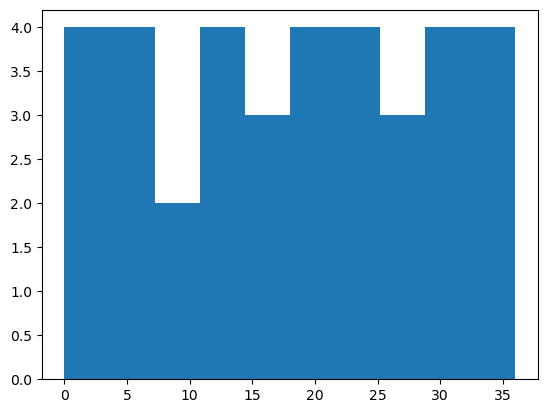

In [102]:
# Raster value statistics can be visualized in a variety of ways
# One approach is to flatten the raster values into a 1-dimensional array using .flatten then use a graphical function 
# such as plt.hist/plt.boxplot
plt.hist(elev.flatten())

In [105]:
# To summarize the distribution of values in a categorical raster, we can calculate the frequencies of unique values 
# and draw them using a barplot
grain = src_grain.read(1)
grain

array([[1, 0, 1, 2, 2, 2],
       [0, 2, 0, 0, 2, 1],
       [0, 2, 2, 0, 0, 2],
       [0, 0, 1, 1, 1, 1],
       [1, 1, 1, 2, 1, 1],
       [2, 1, 2, 2, 0, 2]], dtype=uint8)

In [107]:
# To calculate the freq of unique values in an array, we use the np.unique function with return_counts=True
freq = np.unique(grain, return_counts=True)
freq  # the result is a tuple with two corresponding arrays

(array([0, 1, 2], dtype=uint8), array([10, 13, 13], dtype=int64))

<BarContainer object of 3 artists>

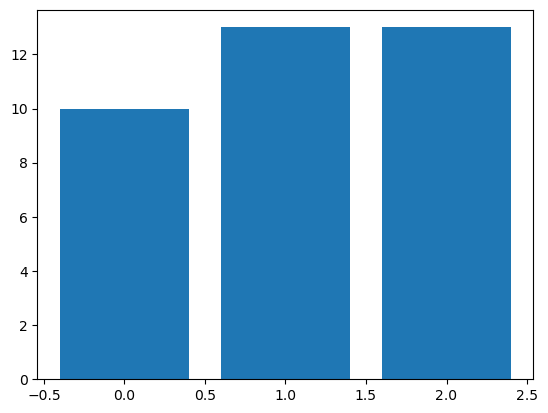

In [110]:
plt.bar(*freq)   # * expression unpacks the tuple within the bar function